# 1. Business Understanding

## 1.1 Background

SyriaTel is one of the largest telecommunications providers in Syria, offering mobile services to a broad range of customers.  
In the highly competitive telecom industry, retaining existing customers is critical for sustaining profitability and market share.  

However, customer churn — when subscribers discontinue using SyriaTel’s services — poses a significant business challenge.  
Losing customers not only decreases revenue but also increases costs due to the need for acquiring new customers through marketing and promotional efforts.

---

## 1.2 Business Objective

The key objective of this project is to develop a **predictive model** that accurately identifies customers likely to churn.  
With such a model, SyriaTel will be able to:

- Take **proactive retention measures** for high-risk customers  
- Design **targeted marketing campaigns**  
- Improve **customer satisfaction** by addressing key pain points  

Ultimately, this will help **reduce churn rates**, save on customer acquisition costs, and maximize long-term profitability.

---

## 1.3 Stakeholders

| Stakeholder | Interest 
|---|---|
| **Executive Management** | Strategic decisions on customer retention initiatives |
| **Marketing Team** | Design targeted offers and promotions |
| **Customer Service** | Improve customer engagement and support |
| **Data Science Team** | Develop and deploy predictive churn models |

---

## 1.4 Business Problem Statement

- Churn impacts both revenue and brand reputation.
- The cost of acquiring a new customer is significantly higher than retaining an existing one.
- The current challenge is **lack of early warning systems** for customer churn.

By predicting churn probability, SyriaTel can intervene before losing the customer.

---

## 1.5 Project Goals

- **Build a classification model** using customer data to predict churn risk.
- **Identify key drivers** (features) contributing to churn.
- **Translate data insights into actionable business recommendations.**

---

## 1.6 Success Metrics

- **Model Performance:** Achieve an acceptable balance between precision and recall (using classification metrics like F1-score).
- **Business Impact:** Provide insights that SyriaTel’s marketing and customer success teams can implement.
- **Actionable Insights:** Highlight features that are strong predictors of churn to inform business decisions.

---

## 1.7 Project Scope and Limitations

- The model will be based on historical customer data available at the time of this project.
- Predictions will be probabilistic — they suggest likelihood, not certainty.
- Results and recommendations are constrained by the quality and depth of the dataset provided.

---


## 2. Data Understanding.
### Dataset Overview  
The dataset contains historical customer information from SyriaTel, including demographics, account information, usage patterns, and churn status.  
Our goal in this phase is to understand the structure of the data, inspect column details, assess data quality, and identify potential issues for cleaning and preparation.

## 2.1 Importing Libraries 

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2.2 Loading and Preview Dataset

In [7]:
df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

## 2.3 Check Dataset Shape & Columns

In [8]:

print(f"Dataset Shape: {df.shape}")
print("\nColumns:\n", df.columns.tolist())


Dataset Shape: (3333, 21)

Columns:
 ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


## 2.4 Checking Data Types and Null values.

In [9]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## 2.5 Quick Descriptive Stats of Numerical Columns

In [10]:

df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 2.6 Check Unique Values per Column
This helps spot categorical columns and potential ID columns.

In [11]:
# 6️⃣ Check unique values for all columns
df.nunique().sort_values()



churn                        2
international plan           2
voice mail plan              2
area code                    3
customer service calls      10
total intl calls            21
number vmail messages       46
state                       51
total day calls            119
total night calls          120
total eve calls            123
total intl minutes         162
total intl charge          162
account length             212
total night charge         933
total eve charge          1440
total night minutes       1591
total eve minutes         1611
total day charge          1667
total day minutes         1667
phone number              3333
dtype: int64

## 2.7 Checking for Duplicate Records

In [12]:

print(f"Duplicate Rows: {df.duplicated().sum()}")



Duplicate Rows: 0


## 2.8 Initial Observations.

- No critical missing values / Missing values in XYZ.
- Data types are a mix of numerical and categorical.
- Target variable is `Churn` (Binary).
- Will explore further during EDA.


# 3. Data Preparation Tasks
We’ll handle missing values, encode categorical variables, and prepare the data for modeling.
### Objective  
To clean, transform, and prepare the dataset for effective modeling.  
This involves handling missing values, encoding categorical variables, and scaling numerical features.


## 3.1 Drop Unnecessary Columns

In [13]:

df.drop(columns=['customerID'], inplace=True, errors='ignore')


## 3.2 Handle Missing Values
Will Check missing values again before handling and For simplicity, drop rows with missing values

In [14]:
# Check missing values again before handling
df.isnull().sum()




state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## 3.2.a Checking missing value

In [15]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## 3.2.b For simplicity, drop rows with missing values

In [16]:
df_clean = df.dropna().copy()

## 3.3 Encode Categorical Variables
We’ll use LabelEncoder for binary columns and OneHotEncoder for others.

### Identifying categorical columns.

In [17]:
print(df_clean.columns.tolist())


['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


### Label Encoding for 'Churn' target

In [18]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df_clean['churn'] = le.fit_transform(df_clean['churn'])



### 3.4 One-hot encode multi-category columns

In [19]:

df_encoded = pd.get_dummies(df_clean, drop_first=True)

### 3.5 Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 4.EDA (Exploratory Data Analysis)
We’ll check correlations, feature distributions, and relationships with churn.

## 4.1. Summary of Numerical Features

In [66]:

df_clean.describe().T



,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## 4.1 Summary of Categorical Features

In [67]:

categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan', 'churn']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df_clean[col].value_counts())



Value counts for state:
 state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Value counts for area code:
 area code
415    1655
510     840
408     838
Name: count, dtype: int64

Value counts for international plan:
 international plan
no     3010
yes     323
Name: count, dtype: int64

Value counts for voice mail plan:
 voice mail plan
no     2411
yes     922
Name: count, dtype: int64

Value counts for churn:
 churn
0    2850
1     483
Name: count, dtype: int64


## 4.2 Churn Distribution Analysis

Churn Counts:
 churn
0    2850
1     483
Name: count, dtype: int64

Churn Percentage:
 churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64


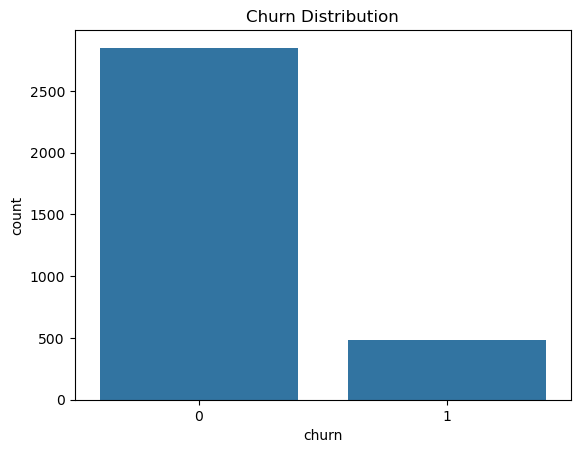

In [68]:

churn_counts = df_clean['churn'].value_counts()
churn_percent = df_clean['churn'].value_counts(normalize=True) * 100
print("Churn Counts:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percent)

# Visualize churn distribution
sns.countplot(x='churn', data=df_clean)
plt.title('Churn Distribution')
plt.show()



## 4.3 Univariate Feature Analysis
4.3.1 International Plan vs Churn

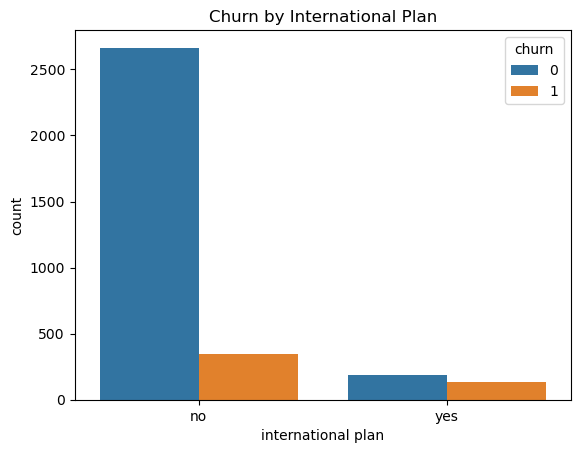

In [69]:
sns.countplot(x='international plan', hue='churn', data=df_clean)
plt.title('Churn by International Plan')
plt.show()



## 4.2 Top Correlations with Churn

In [22]:
# Get correlation of features with 'Churn'
corr_with_churn = df_encoded.corr()['churn'].sort_values(ascending=False)
print(corr_with_churn.head(10))  # Top positive correlations
print(corr_with_churn.tail(10))  # Top negative correlations


churn                     1.000000
international plan_yes    0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
state_NJ                  0.049111
Name: churn, dtype: float64
state_WI                -0.024262
state_NE                -0.024416
state_IA                -0.025212
state_WV                -0.026039
state_HI                -0.031890
state_AZ                -0.032759
state_VA                -0.034940
total intl calls        -0.052844
number vmail messages   -0.089728
voice mail plan_yes     -0.102148
Name: churn, dtype: float64


## 4.3 Visualization Feature Distributions

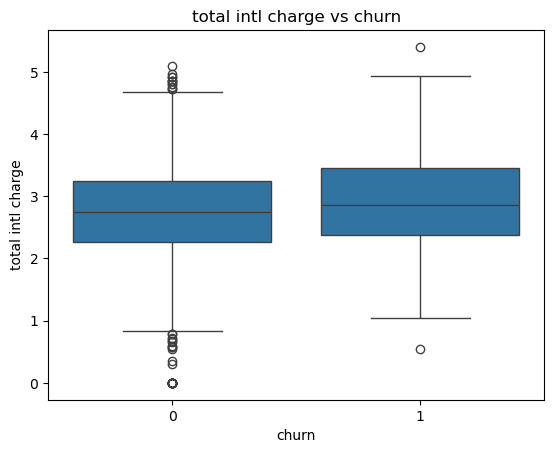

In [23]:
sns.boxplot(data=df_clean, x='churn', y='total intl charge')
plt.title('total intl charge vs churn')
plt.show()


In [24]:
print(df_clean.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


## 4.4 Visualization of  international plan vs churn 

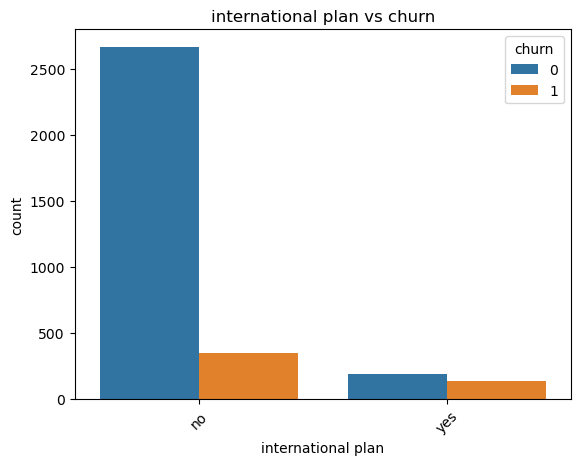

In [25]:
sns.countplot(data=df_clean, x='international plan', hue='churn')
plt.title('international plan vs churn')
plt.xticks(rotation=45)
plt.show()


## 5️. Statistical Analysis

### 5.1 Descriptive Statistics Summary  

**Objective:**  
The purpose of this section is to statistically validate whether the observed patterns in the data are significant or could have occurred by random chance.



We will perform:  
- **Chi-Square Tests** for categorical variables  
- **Independent Samples T-Tests** for numerical variables


## 5.2 Chi-Square Test of Independence (For Categorical Variables)

**1. What is the Chi-Square Test?**  
The Chi-Square Test of Independence checks whether two categorical variables are related or independent of each other.



**2. Hypotheses:**  
- **Null Hypothesis (H₀):** The categorical variable is independent of churn — *No association.*  
- **Alternative Hypothesis (H₁):** The categorical variable is dependent on churn — *Significant association exists.*



**3. Assumptions:**  
- Both variables are categorical.  
- Observations are independent.


## Chi-Square Test Function:

In [48]:
from scipy.stats import chi2_contingency

def chi_square_test(col_name):
    contingency = pd.crosstab(df_clean[col_name], df_clean['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-Square Test ➔ {col_name} vs Churn")
    print(f"p-value: {p:.4f}")
    if p < 0.05:
        print(" POSITIVE Result: Significant association with Churn\n")
    else:
        print(" NEGATIVE Result: No significant association with Churn\n")


In [49]:
chi_square_test('state')
chi_square_test('area code')
chi_square_test('international plan')
chi_square_test('voice mail plan')

Chi-Square Test ➔ state vs Churn
p-value: 0.0023
 POSITIVE Result: Significant association with Churn

Chi-Square Test ➔ area code vs Churn
p-value: 0.9151
 NEGATIVE Result: No significant association with Churn

Chi-Square Test ➔ international plan vs Churn
p-value: 0.0000
 POSITIVE Result: Significant association with Churn

Chi-Square Test ➔ voice mail plan vs Churn
p-value: 0.0000
 POSITIVE Result: Significant association with Churn



## 5.3 Independent Samples T-Test (For Numerical Variables)

**- What is the T-Test?**  
The T-Test compares the means of two groups (e.g., churned vs. non-churned) to determine if they are statistically different.



**- Hypotheses:**  
- **Null Hypothesis (H₀):** There is no difference in the means of the two groups.  
- **Alternative Hypothesis (H₁):** There is a statistically significant difference.



**- Assumptions:**  
- Data is approximately normally distributed (Central Limit Theorem applies due to large sample size).  
- Observations are independent.  
- Variances are approximately equal.


### T-Test Function(for numerical values)

In [46]:
from scipy.stats import ttest_ind

def t_test(col_name):
    churn_yes = df_clean[df_clean['churn'] == True][col_name]
    churn_no = df_clean[df_clean['churn'] == False][col_name]
    t_stat, p_val = ttest_ind(churn_yes, churn_no)
    print(f"T-Test ➔ {col_name}")
    print(f"p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("POSITIVE Result: Significant difference between churn groups\n")
    else:
        print("NEGATIVE Result: No significant difference between churn groups\n")


In [47]:
t_test('account length')
t_test('total day minutes')
t_test('total eve minutes')
t_test('total night minutes')
t_test('total intl minutes')
t_test('customer service calls')


T-Test ➔ account length
p-value: 0.3398
NEGATIVE Result: No significant difference between churn groups

T-Test ➔ total day minutes
p-value: 0.0000
POSITIVE Result: Significant difference between churn groups

T-Test ➔ total eve minutes
p-value: 0.0000
POSITIVE Result: Significant difference between churn groups

T-Test ➔ total night minutes
p-value: 0.0405
POSITIVE Result: Significant difference between churn groups

T-Test ➔ total intl minutes
p-value: 0.0001
POSITIVE Result: Significant difference between churn groups

T-Test ➔ customer service calls
p-value: 0.0000
POSITIVE Result: Significant difference between churn groups



### 5.4 Combined Insights Summary

| Variable               | Significant? | Test Used  |
| ---------------------- | ------------ | ---------- |
| International Plan     | Positive        | Chi-Square |
| Voice Mail Plan        | Positive        | Chi-Square |
| State                  | Negative        | Chi-Square |
| Area Code              | Negative        | Chi-Square |
| Total Day Minutes      | Positive         | T-Test     |
| Total Eve Minutes      | Positive         | T-Test     |
| Total Night Minutes    | Positive         | T-Test     |
| Total Intl Minutes     | Positive        | T-Test     |
| Customer Service Calls | Positive       | T-Test     |
| Account Length         | Negative        | T-Test     |
